## Basic Descriptive Statistics on Road Safety 

This notebook explores the statistics of road safety downloaded from [data.gov.uk](https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data)

The road safety data is split into 3 different sets: 

1. Casualties - information on casualty age band, count, severity, location of casualty; 
2. Collisions - information of the collison including geographical coordinates, number of vehicles invovled, time, road conditions, speed limit, weather etc  
3. Vehicles - information of the cars including size etc 

These data sets are also available across time, so a time series analysis can be carried out as well. 

In [57]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.reset_option('display.max_columns')


In [58]:
import os
os.chdir('/home/jovyan/work/Quantitative-Methods')
print(os.getcwd())

/home/jovyan/work/Quantitative-Methods


In [59]:
dtype_dict = {0: 'str', 2: 'str'}

collision = pd.read_csv('data/dft-road-casualty-statistics-collision-2023.csv', dtype=dtype_dict)

In [60]:
collision

,accident_index,accident_year,accident_reference,location_easting_osgr,j,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,enhanced_severity_collision
0,2.02301E+12,2023,10419171,525060.0,170416.0,-0.202878,51.418974,1,3,1,...,4,8,2,0,0,1,1,2,E01003383,-1
1,2.02301E+12,2023,10419183,535463.0,198745.0,-0.042464,51.671155,1,3,3,...,4,1,1,0,0,1,1,2,E01001547,-1
2,2.02301E+12,2023,10419189,508702.0,177696.0,-0.435789,51.487777,1,3,2,...,4,1,1,0,0,1,1,2,E01002448,-1
3,2.02301E+12,2023,10419191,520341.0,190175.0,-0.263972,51.597575,1,3,2,...,4,9,1,0,0,1,1,2,E01000129,-1
4,2.02301E+12,2023,10419192,527255.0,176963.0,-0.168976,51.477324,1,3,2,...,4,1,1,0,0,1,1,2,E01004583,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104253,2.02399E+12,2023,991452286,246754.0,661133.0,-4.447490,55.819059,99,2,1,...,5,2,2,-1,-1,1,1,-1,-1,7
104254,2.02399E+12,2023,991452640,224491.0,581627.0,-4.752200,55.097920,99,3,2,...,1,9,1,0,0,2,2,-1,-1,3
104255,2.02399E+12,2023,991453360,383341.0,806427.0,-2.276957,57.148422,99,3,2,...,4,2,2,-1,-1,1,1,-1,-1,3
104256,2.02399E+12,2023,991461915,271662.0,655488.0,-4.047591,55.775637,99,3,1,...,4,8,1,-1,-1,1,1,-1,-1,3


In [61]:
mask = collision['lsoa_of_accident_location'] == '-1'
collision = collision[~mask]
collision
#deleted those rows with -1 

,accident_index,accident_year,accident_reference,location_easting_osgr,j,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,enhanced_severity_collision
0,2.02301E+12,2023,10419171,525060.0,170416.0,-0.202878,51.418974,1,3,1,...,4,8,2,0,0,1,1,2,E01003383,-1
1,2.02301E+12,2023,10419183,535463.0,198745.0,-0.042464,51.671155,1,3,3,...,4,1,1,0,0,1,1,2,E01001547,-1
2,2.02301E+12,2023,10419189,508702.0,177696.0,-0.435789,51.487777,1,3,2,...,4,1,1,0,0,1,1,2,E01002448,-1
3,2.02301E+12,2023,10419191,520341.0,190175.0,-0.263972,51.597575,1,3,2,...,4,9,1,0,0,1,1,2,E01000129,-1
4,2.02301E+12,2023,10419192,527255.0,176963.0,-0.168976,51.477324,1,3,2,...,4,1,1,0,0,1,1,2,E01004583,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100021,202363D036223,2023,63D036223,310228.0,290597.0,-3.324047,52.505853,63,3,1,...,1,1,1,0,0,1,1,-1,W01000483,-1
100022,202363D036323,2023,63D036323,315276.0,293879.0,-3.250532,52.536159,63,3,2,...,1,1,1,0,0,2,1,-1,W01000439,-1
100023,202363D037923,2023,63D037923,298963.0,218239.0,-3.468376,51.853568,63,3,2,...,1,1,2,0,0,2,1,-1,W01001897,-1
100024,202363DF00223,2023,63DF00223,305338.0,326185.0,-3.406302,52.824853,63,1,1,...,1,1,4,0,0,2,1,-1,W01001906,-1


In [62]:
lsoa = pd.read_csv('data/lsoa_name.csv')
lsoa.head()
lsoa_list = lsoa.values.tolist() # change column to list 
print(lsoa_list[:10]) #but this generate a list of lists, which is what we do not want, we want a list 

import itertools

lsoa_list = list(itertools.chain.from_iterable(lsoa_list))
print(lsoa_list[:10]) #removed the big list brackets [] 

[['E01000001'], ['E01000002'], ['E01000003'], ['E01000005'], ['E01000006'], ['E01000007'], ['E01000008'], ['E01000009'], ['E01000011'], ['E01000012']]
['E01000001', 'E01000002', 'E01000003', 'E01000005', 'E01000006', 'E01000007', 'E01000008', 'E01000009', 'E01000011', 'E01000012']


In [63]:
filtered_collision = collision[collision['lsoa_of_accident_location'].isin(lsoa_list)]
filtered_collision


,accident_index,accident_year,accident_reference,location_easting_osgr,j,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,enhanced_severity_collision
0,2.02301E+12,2023,10419171,525060.0,170416.0,-0.202878,51.418974,1,3,1,...,4,8,2,0,0,1,1,2,E01003383,-1
1,2.02301E+12,2023,10419183,535463.0,198745.0,-0.042464,51.671155,1,3,3,...,4,1,1,0,0,1,1,2,E01001547,-1
2,2.02301E+12,2023,10419189,508702.0,177696.0,-0.435789,51.487777,1,3,2,...,4,1,1,0,0,1,1,2,E01002448,-1
3,2.02301E+12,2023,10419191,520341.0,190175.0,-0.263972,51.597575,1,3,2,...,4,9,1,0,0,1,1,2,E01000129,-1
4,2.02301E+12,2023,10419192,527255.0,176963.0,-0.168976,51.477324,1,3,2,...,4,1,1,0,0,1,1,2,E01004583,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87863,2.02348E+12,2023,481407567,531350.0,181567.0,-0.108331,51.517763,48,2,1,...,4,8,2,0,0,1,3,2,E01000917,5
87864,2.02348E+12,2023,481409647,531556.0,181647.0,-0.105334,51.518434,48,2,1,...,4,1,1,0,0,1,1,2,E01032740,7
87865,2.02348E+12,2023,481409652,533386.0,181660.0,-0.078970,51.518122,48,3,1,...,4,2,2,0,0,1,1,2,E01032739,3
87866,2.02348E+12,2023,481409658,531594.0,181423.0,-0.104870,51.516412,48,3,2,...,4,1,1,0,0,1,3,2,E01032740,3


In [64]:
collision['accident_severity'].unique()

array([3, 2, 1])

In [65]:
collision['number_of_vehicles'].unique()

array([ 1,  3,  2,  5,  6,  4,  7,  8, 12,  9, 17, 14, 11, 13, 10])

In [66]:
collision['speed_limit'].unique()

array([20, 30, 50, 40, 70, 60])

In [67]:
pd.reset_option('display.max_rows')
list1 = collision['time'].unique()
list1

array(['1:24', '2:25', '3:50', ..., '5:01', '6:21', '3:34'], dtype=object)

In [68]:
collision['day_of_week'].unique()

array([1, 2, 3, 4, 5, 6, 7])

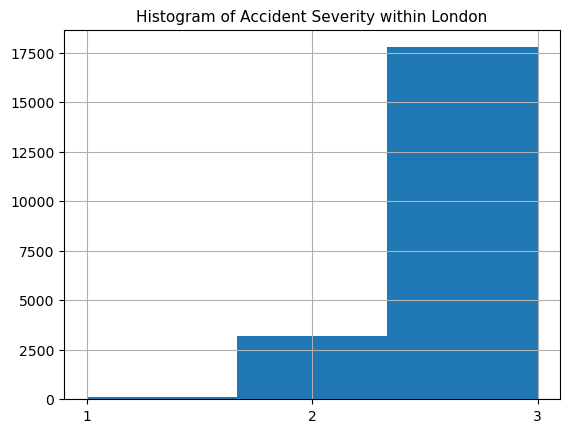

In [69]:
collision_severity = filtered_collision['accident_severity']

import matplotlib.ticker as mticker 
ax = collision_severity.hist(bins=3, )
ax.set_title("Histogram of Accident Severity within London", fontsize=11, color='black')
ax.xaxis.set_major_locator(mticker.MultipleLocator(1))

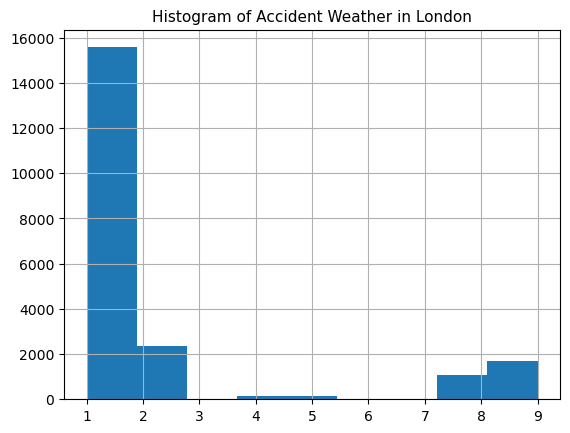

In [70]:
collision_weather = filtered_collision['weather_conditions']

import matplotlib.ticker as mticker 
ax = collision_weather.hist(bins=9, )
ax.set_title("Histogram of Accident Weather in London", fontsize=11, color='black')
ax.xaxis.set_major_locator(mticker.MultipleLocator(1))

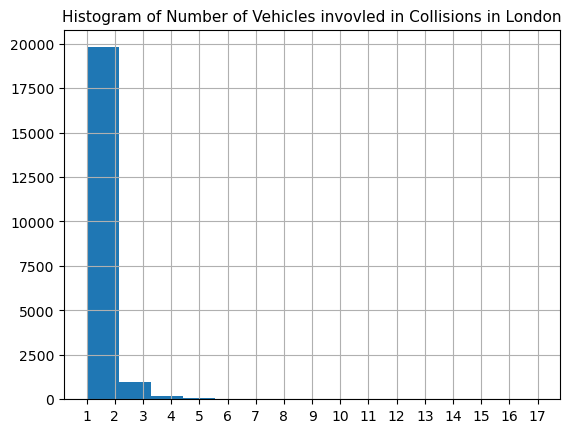

In [71]:
collision_vehicle = filtered_collision['number_of_vehicles']

import matplotlib.ticker as mticker 
ax = collision_vehicle.hist(bins=14, )
ax.set_title("Histogram of Number of Vehicles invovled in Collisions in London", fontsize=11, color='black')
ax.xaxis.set_major_locator(mticker.MultipleLocator(1))

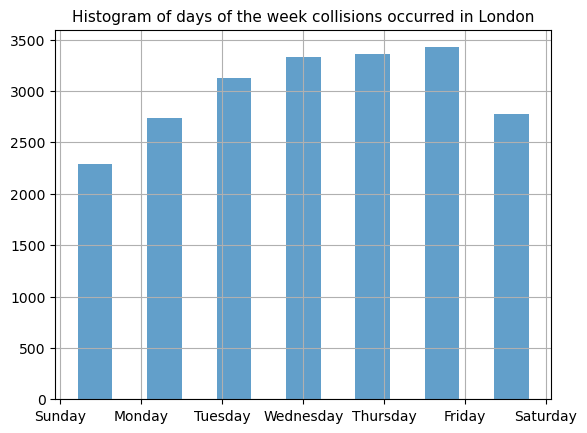

In [72]:
collision_day = filtered_collision['day_of_week']
day_mapping = {
    1: "Sunday",
    2: "Monday",
    3: "Tuesday",
    4: "Wednesday",
    5: "Thursday",
    6: "Friday",
    7: "Saturday"
}

# Replace values in the column
collision_day = collision_day.replace(day_mapping)

import matplotlib.ticker as mticker 
ax = collision_day.hist(bins=7, alpha=0.7, rwidth=0.5)
ax.set_title("Histogram of days of the week collisions occurred in London", fontsize=11, color='black')
ax.xaxis.set_major_locator(mticker.MultipleLocator(1))

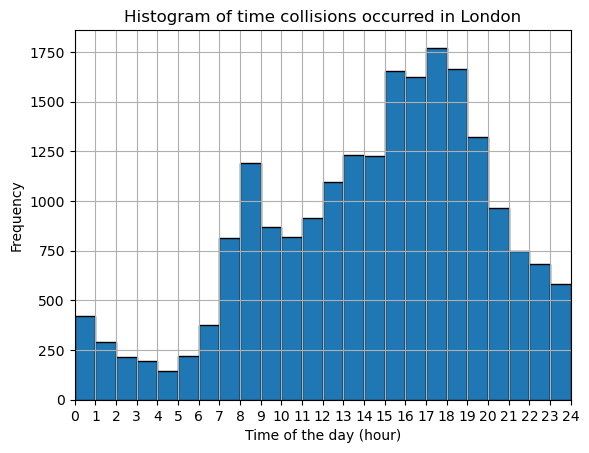

In [73]:
time = filtered_collision['time'].str.split(':').str[0].astype(int)
time = time.sort_values()

import matplotlib.ticker as mticker 

ax = time.hist(bins=np.arange(0, 25, 1), edgecolor='black', grid=True)

# Set the x-axis limit to be from 0 to 24
ax.set_xlim(0, 24)
ax.xaxis.set_major_locator(mticker.MultipleLocator(1))

# Add title and labels
plt.title('Histogram of time collisions occurred in London')
plt.xlabel('Time of the day (hour)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Text(0, 0.5, 'Frequency')

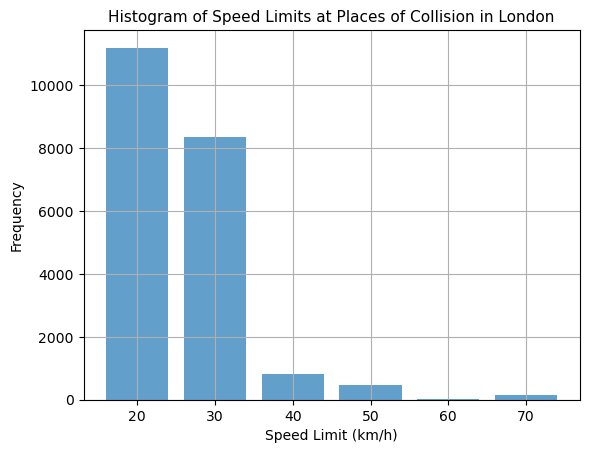

In [74]:
collision_speed = filtered_collision['speed_limit']
bin_edges = [15, 25, 35, 45, 55, 65, 75] 

import matplotlib.ticker as mticker 
ax = collision_speed.hist(bins=bin_edges, alpha=0.7, rwidth=0.8)
ax.set_title("Histogram of Speed Limits at Places of Collision in London", fontsize=11, color='black')
plt.xlabel('Speed Limit (km/h)')
plt.ylabel('Frequency')

# Poisson Regression Model 
## Model accident rates by the time of day and investigate whether accidents occur more frequently at specific times

Dependent Variable (Response): Number of accidents (𝑌) during a given time period.

Independent Variable (Predictor): Time of day (e.g., hours or categorical ranges like "morning," "afternoon").

Exposure Variable: Denominator for the accident rate, such as the total number of vehicles or duration (e.g., hours).

## Step 1: Prepare Data for Dependent Variable (Number of Accidents during given hour) 

In [75]:
time2 = filtered_collision[['time']]
print(time2['time'].dtype)

object


In [76]:
time2.loc[:, 'hour'] = time2['time'].str.split(':').str[0].astype(int)
time2['hour'].unique()
time2

/tmp/ipykernel_2140/2737711228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time2.loc[:, 'hour'] = time2['time'].str.split(':').str[0].astype(int)


,time,hour
0,1:24,1
1,2:25,2
2,3:50,3
3,2:13,2
4,1:42,1
...,...,...
87863,19:15,19
87864,18:00,18
87865,23:00,23
87866,7:15,7


In [77]:
counts = time2['hour'].value_counts().reset_index()
# Rename the columns for clarity
counts.columns = ['hour', 'count']
counts

,hour,count
0,17,1772
1,18,1667
2,15,1654
3,16,1625
4,19,1323
5,13,1231
6,14,1227
7,8,1192
8,12,1094
9,20,967


In [78]:
tcount = pd.read_csv('data/dft-traffic-count.csv', low_memory=False)
filtert =  tcount[tcount['year'] == 2023]
total_values = filtert.groupby('hour')['all_motor_vehicles'].sum().reset_index()
total_values

,hour,all_motor_vehicles
0,7,865860.0
1,8,863085.0
2,9,794013.0
3,10,748392.0
4,11,757468.0
5,12,781128.0
6,13,796331.0
7,14,836650.0
8,15,879426.0
9,16,915726.0


In [79]:
tcount['hour'].unique()

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [80]:
poisson = pd.merge(total_values, counts,how='left', on=['hour'])
poisson

,hour,all_motor_vehicles,count
0,7,865860.0,815
1,8,863085.0,1192
2,9,794013.0,872
3,10,748392.0,817
4,11,757468.0,915
5,12,781128.0,1094
6,13,796331.0,1231
7,14,836650.0,1227
8,15,879426.0,1654
9,16,915726.0,1625


In [81]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

poisson['log_traffic_volume'] = np.log(poisson['all_motor_vehicles'])
model = smf.glm(
    formula='count ~ hour',
    data=poisson,
    family=sm.families.Poisson(),
    offset=poisson['log_traffic_volume']
).fit()

print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  count   No. Observations:                   12
Model:                            GLM   Df Residuals:                       10
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -116.53
Date:                Wed, 04 Dec 2024   Deviance:                       125.99
Time:                        10:35:12   Pearson chi2:                     130.
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.2783      0.033   -221.881      0.0

0.0583 for the coef of hour means that accident rates increase by approximately 5.83% per additional hour.

-7.1918 for the coef of intercept means that accident rate at midnight = e^-7.1918 

Since the p-value for time_of_day is less than 0.05 (0.000), we can conclude that time of day significantly affects accident rate

In [82]:
p_value_time_of_day = model.pvalues['hour']
# Print the p-value with more decimals
print(f"P-value for time_of_day: {p_value_time_of_day:.20f}")

P-value for time_of_day: 0.00000000000000000000


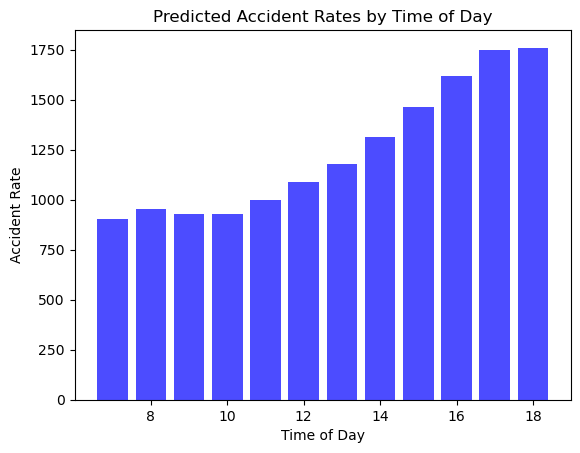

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Predicted rates
poisson['predicted_accidents'] = model.predict()
plt.bar(poisson['hour'], poisson['predicted_accidents'], color='blue', alpha=0.7)
plt.title("Predicted Accident Rates by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Accident Rate")
plt.show()

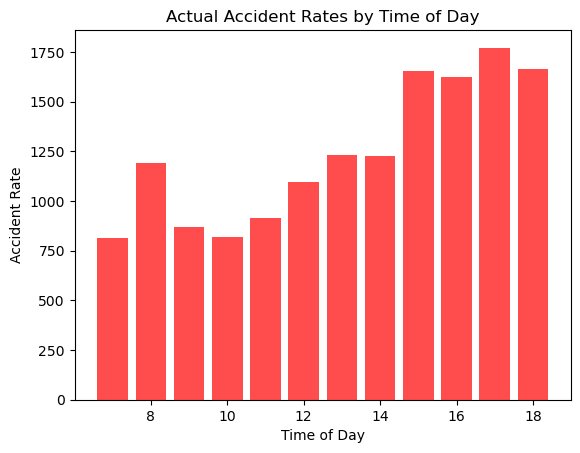

In [84]:
plt.bar(poisson['hour'], poisson['count'], color='red', alpha=0.7)
plt.title("Actual Accident Rates by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Accident Rate")
plt.show()

In [85]:
print(f"AIC: {model.aic}")

AIC: 237.053192236639


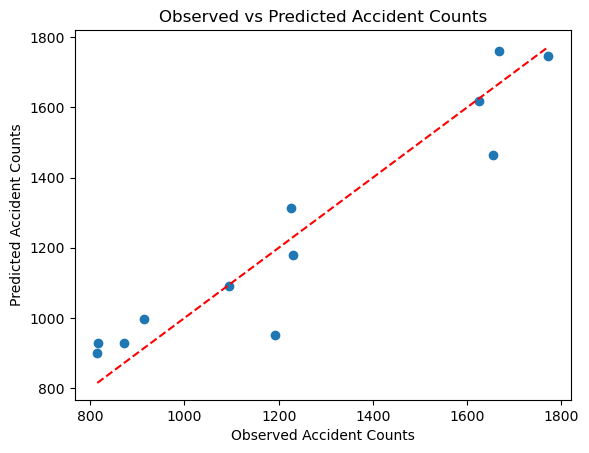

In [86]:
predicted_values = model.fittedvalues

import matplotlib.pyplot as plt

# Observed values

# Plot observed vs predicted
plt.scatter(poisson['count'], predicted_values)
plt.xlabel("Observed Accident Counts")
plt.ylabel("Predicted Accident Counts")
plt.title("Observed vs Predicted Accident Counts")

plt.plot([min(poisson['count']), max(poisson['count'])], 
         [min(poisson['count']), max(poisson['count'])], 
         color='red', linestyle='--', label='Ideal: Observed = Predicted')
plt.show()


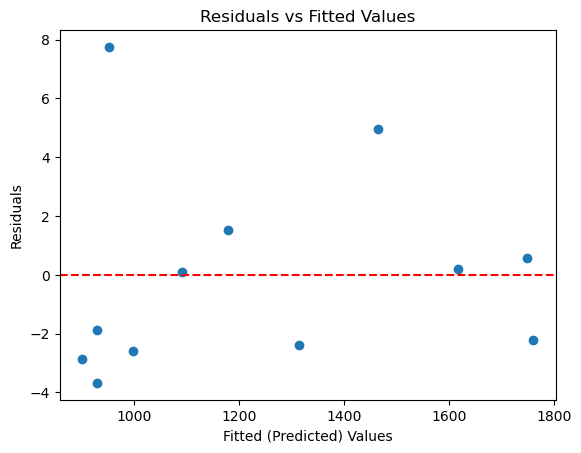

In [87]:
residuals = model.resid_pearson

plt.scatter(predicted_values, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Fitted (Predicted) Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

This plot is useful for checking for patterns in residuals. Residuals should be scattered randomly around zero with no clear pattern, suggesting that the model's assumptions hold.

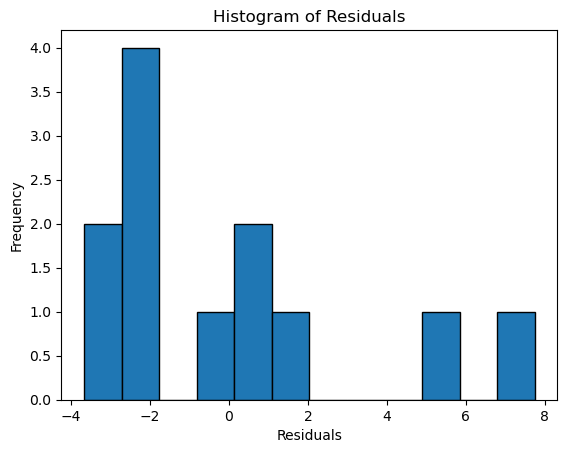

In [88]:
plt.hist(residuals, bins=12, edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

In [89]:
filtered_collision

,accident_index,accident_year,accident_reference,location_easting_osgr,j,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,enhanced_severity_collision
0,2.02301E+12,2023,10419171,525060.0,170416.0,-0.202878,51.418974,1,3,1,...,4,8,2,0,0,1,1,2,E01003383,-1
1,2.02301E+12,2023,10419183,535463.0,198745.0,-0.042464,51.671155,1,3,3,...,4,1,1,0,0,1,1,2,E01001547,-1
2,2.02301E+12,2023,10419189,508702.0,177696.0,-0.435789,51.487777,1,3,2,...,4,1,1,0,0,1,1,2,E01002448,-1
3,2.02301E+12,2023,10419191,520341.0,190175.0,-0.263972,51.597575,1,3,2,...,4,9,1,0,0,1,1,2,E01000129,-1
4,2.02301E+12,2023,10419192,527255.0,176963.0,-0.168976,51.477324,1,3,2,...,4,1,1,0,0,1,1,2,E01004583,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87863,2.02348E+12,2023,481407567,531350.0,181567.0,-0.108331,51.517763,48,2,1,...,4,8,2,0,0,1,3,2,E01000917,5
87864,2.02348E+12,2023,481409647,531556.0,181647.0,-0.105334,51.518434,48,2,1,...,4,1,1,0,0,1,1,2,E01032740,7
87865,2.02348E+12,2023,481409652,533386.0,181660.0,-0.078970,51.518122,48,3,1,...,4,2,2,0,0,1,1,2,E01032739,3
87866,2.02348E+12,2023,481409658,531594.0,181423.0,-0.104870,51.516412,48,3,2,...,4,1,1,0,0,1,3,2,E01032740,3


In [90]:
dtype_dict = {0: 'str', 2: 'str'}

casualty = pd.read_csv('data/dft-road-casualty-statistics-casualty-last-5-years.csv', dtype=dtype_dict)

mask = casualty['lsoa_of_casualty'] == '-1'
casualty = casualty[~mask]
filtered_casualty = casualty[casualty['lsoa_of_casualty'].isin(lsoa_list)]
#23841 data points 

severity = filtered_casualty[['casualty_severity','lsoa_of_casualty','accident_year']]
severity2023 = severity[severity['accident_year'] == 2023]
severity2022 = severity[severity['accident_year'] == 2022]
severity2021 = severity[severity['accident_year'] == 2021]
#split based on year 

counts = severity2023['lsoa_of_casualty'].value_counts()
count_unique2023 = severity2023.drop_duplicates(subset='lsoa_of_casualty').copy()
count_unique2023['count'] = severity2023['lsoa_of_casualty'].map(counts)
count_unique2023

counts2 = severity2022['lsoa_of_casualty'].value_counts()
count_unique2022 = severity2022.drop_duplicates(subset='lsoa_of_casualty').copy()
count_unique2022['count'] = severity2022['lsoa_of_casualty'].map(counts)

counts3 = severity2021['lsoa_of_casualty'].value_counts()
count_unique2021 = severity2021.drop_duplicates(subset='lsoa_of_casualty').copy()
count_unique2021['count'] = severity2021['lsoa_of_casualty'].map(counts)
count_unique2021

,casualty_severity,lsoa_of_casualty,accident_year,count
268743,3,E01003955,2021,8.0
268744,3,E01004202,2021,7.0
268745,2,E01004295,2021,6.0
268746,3,E01002056,2021,9.0
268747,2,E01003024,2021,10.0
...,...,...,...,...
383560,3,E01032583,2021,6.0
383932,2,E01004029,2021,7.0
384102,2,E01003808,2021,5.0
385060,3,E01004101,2021,5.0


# Calculating Casualty Rate and Casualty Location Rate 

In [91]:
count_unique2023['lsoa'] = count_unique2023['lsoa_of_casualty']
count_unique2022['lsoa'] = count_unique2022['lsoa_of_casualty']
count_unique2021['lsoa'] = count_unique2021['lsoa_of_casualty']

pop = pd.read_csv("data/population_count.csv")
dataframes = [pop]

# Loop through each dataframe
for i, item in enumerate(dataframes):
    item.dropna(subset=['lsoa'], inplace=True)   # Drop rows with NaN in 'lsoa'
    item['lsoa'] = item['lsoa'].str[:9]  # Truncate 'lsoa' to first 9 characters
    item = item[item['lsoa'].isin(lsoa_list)] 
    print(f"After filtering: {item.shape[0]} rows")

pop = pop[pop['lsoa'].isin(lsoa_list)]
count = pd.merge(count_unique2023, pop, on='lsoa', how='left')
count = count.rename(columns={'2021': 'pop'})
count['pop'] = count['pop'].str.replace(',', '', regex=False)  # Remove commas
count['pop'] = pd.to_numeric(count['pop'], errors='coerce')
count['casualty_rate'] = 1000 * count['count'] / count['pop'] # calculating casualty rate 

count2 = pd.merge(count_unique2022, pop, on='lsoa', how='left')
count2 = count2.rename(columns={'2021': 'pop'})
count2['pop'] = count2['pop'].str.replace(',', '', regex=False)  # Remove commas
count2['pop'] = pd.to_numeric(count2['pop'], errors='coerce')
count2['casualty_rate'] = 1000 * count2['count'] / count2['pop']

count3 = pd.merge(count_unique2021, pop, on='lsoa', how='left')
count3 = count3.rename(columns={'2021': 'pop'})
count3['pop'] = count3['pop'].str.replace(',', '', regex=False)  # Remove commas
count3['pop'] = pd.to_numeric(count3['pop'], errors='coerce')
count3['casualty_rate'] = 1000 * count3['count'] / count3['pop']

After filtering: 4994 rows


In [92]:
# reading deprivation ranking 1 - 10 
imd = pd.read_csv("data/lsoa-reference-data.csv")
imd = imd[['LSOA Code','IMD Decile','Census Year']]
imd = imd[imd['Census Year'] == 2021]
imd = imd.rename(columns={'LSOA Code': 'lsoa'})

In [93]:
# merge 2021, 2022 and 2023 casualty rate with deprivation ranking 
count = pd.merge(count, imd, on='lsoa', how='left')
count2 = pd.merge(count2, imd, on='lsoa', how='left')
count3 = pd.merge(count3, imd, on='lsoa', how='left')

In [94]:
# ensure all column has values and renaming to prevent errors when merging later
count.dropna(subset=['IMD Decile'], inplace=True)
count2.dropna(subset=['IMD Decile'], inplace=True)
count3.dropna(subset=['IMD Decile'], inplace=True)
count2 = count2.rename(columns={'casualty_rate': 'rate2022'})
count3 = count3.rename(columns={'casualty_rate': 'rate2021'})

In [95]:
# merge all years casualty rate 
count_all = pd.merge(count, count2, on='lsoa', how='left')
count_all = pd.merge(count_all, count3, on='lsoa', how='left')
count_all.dropna(subset=['IMD Decile'], inplace=True)

In [96]:
# tidy columns, find average casualty rate 2021-2023
count_all = count_all[['lsoa','IMD Decile','casualty_rate','rate2021','rate2022']]
count_all['average'] = (count_all['casualty_rate'] + count_all['rate2021'] + count_all['rate2022'] ) / 3

In [97]:
count_all.dropna(subset=['average'], inplace=True)
count_all

,lsoa,IMD Decile,casualty_rate,rate2021,rate2022,average
0,E01001546,3.0,3.309432,3.309432,3.309432,3.309432
1,E01002443,5.0,4.409603,4.409603,4.409603,4.409603
2,E01004679,3.0,3.544304,3.544304,3.544304,3.544304
3,E01003629,3.0,3.081664,3.081664,3.081664,3.081664
4,E01000989,7.0,2.883506,2.883506,2.883506,2.883506
...,...,...,...,...,...,...
4502,E01003812,9.0,0.538793,0.538793,0.538793,0.538793
4503,E01000346,8.0,1.259446,1.259446,1.259446,1.259446
4504,E01004351,6.0,0.607903,0.607903,0.607903,0.607903
4506,E01000136,8.0,0.672948,0.672948,0.672948,0.672948


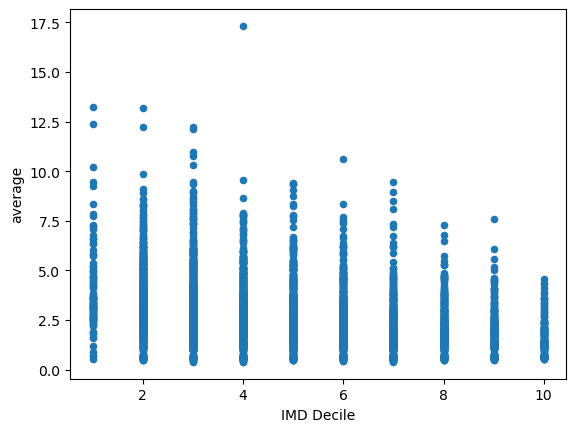

In [98]:
count_all.plot(kind = 'scatter', x = 'IMD Decile', y = 'average')
plt.show()

In [99]:
average_decile = count_all.groupby('IMD Decile')['average'].mean()
average_df = average_decile.reset_index()
average_df

,IMD Decile,average
0,1.0,4.144572
1,2.0,3.462926
2,3.0,3.322077
3,4.0,2.984184
4,5.0,2.890623
5,6.0,2.624476
6,7.0,2.279514
7,8.0,2.091919
8,9.0,1.822608
9,10.0,1.590366


In [100]:
olddata = {
    'IMD Decile': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'average': [4.43, 3.86, 3.50,3.22,2.99,2.68,2.42,2.08,1.86,1.66]
}

df1 = pd.DataFrame(olddata)

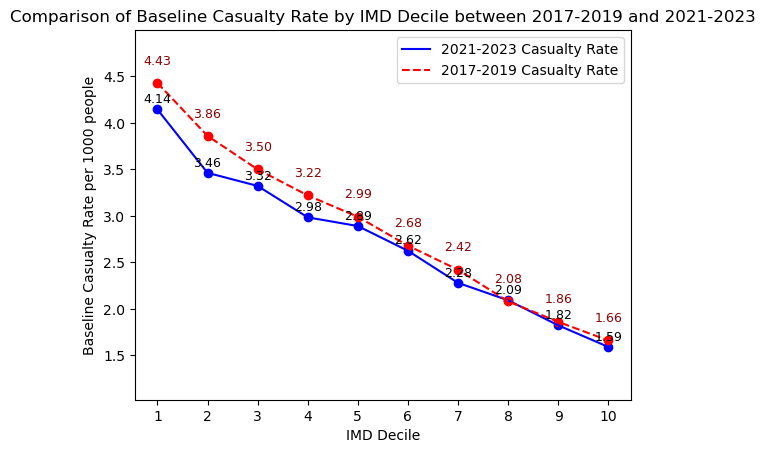

In [101]:
plt.scatter(average_df['IMD Decile'], average_df['average'], color='blue')
plt.plot(average_df['IMD Decile'], average_df['average'], color='blue', linestyle='-', label='2021-2023 Casualty Rate')

# Second scatter plot with line (example data for a second dataset)
# Replace `median_values` with your second dataset values
plt.scatter(df1['IMD Decile'], df1['average'], color='red')
plt.plot(df1['IMD Decile'], df1['average'], color='red', linestyle='--', label='2017-2019 Casualty Rate')

for i in range(len(average_df)):
    plt.text(
        average_df['IMD Decile'][i],                # x-coordinate of the point
        average_df['average'][i] + 0.07,            # y-coordinate slightly above the point
        f"{average_df['average'][i]:.2f}",         # Text to display (formatted to 2 decimals)
        ha='center',                               # Horizontal alignment
        fontsize=9,                                # Font size
        color='black'                              # Text color
    )
    plt.text(
        df1['IMD Decile'][i], 
        df1['average'][i] + 0.2, 
        f"{df1['average'][i]:.2f}", 
        ha='center', fontsize=9, color='darkred'
    )

plt.xticks(ticks=range(1, 11))
# Add labels, title, and legend
plt.xlabel('IMD Decile')
plt.ylabel('Baseline Casualty Rate per 1000 people')
plt.title('Comparison of Baseline Casualty Rate by IMD Decile between 2017-2019 and 2021-2023')
plt.legend()

plt.margins(y=0.2) 

# Show the plot
plt.show()

Baseline casualty rate from 2021-2023 decreased almost across all IMD Decile except for decile 7 compared to 2019-2021, indicating that 
1. There are less casualties in this time period compared to 2019-2021, which might signal better overall road safety for all. 
2. Biggest drops in casualty rates are found in the most deprived deciles such as decile 2 (-0.4), decile 1 (0.29), and decile 4 (0.24). This indicates that casualty rates are becoming less unequal over time. 

# Casualty Location Rate Calculation

In [102]:
collision1 = pd.read_csv("data/dft-road-casualty-statistics-collision-last-5-years.csv", dtype=dtype_dict)

mask = collision1['lsoa_of_accident_location'] == '-1'
collision1 = collision1[~mask]
collision1

filtered_collision = collision1[collision1['lsoa_of_accident_location'].isin(lsoa_list)]

filtered_collision = filtered_collision[['number_of_casualties','lsoa_of_accident_location','accident_year']].rename(columns={'lsoa_of_accident_location': 'lsoa'})
summed_counts = filtered_collision.groupby(['lsoa', 'accident_year'])['number_of_casualties'].sum().reset_index()
# Rename columns for clarity (optional)
summed_counts.columns = ['lsoa', 'year','count']
summed_counts


,lsoa,year,count
0,E01000001,2019,14
1,E01000001,2020,8
2,E01000001,2021,4
3,E01000001,2022,2
4,E01000001,2023,7
...,...,...,...
20334,E01033746,2019,1
20335,E01033746,2020,3
20336,E01033746,2021,6
20337,E01033746,2022,1


In [103]:
coll2023 = summed_counts[summed_counts['year'] == 2023]
coll2022 = summed_counts[summed_counts['year'] == 2022]
coll2021 = summed_counts[summed_counts['year'] == 2021]

imd = pd.read_csv("data/lsoa-reference-data.csv")
imd = imd[imd['Census Year'] == 2021]
imd = imd.rename(columns={'LSOA Code': 'lsoa'})

In [106]:
coll = pd.merge(summed_counts, imd, on='lsoa', how='left')
coll['location_rate'] = (coll['count'] / coll['Road Length'] ) *1000
list1 = [2021, 2022, 2023]
coll = coll[coll['year'].isin(list1)]
coll2 = coll

In [49]:
coll = coll.groupby(['IMD Decile'])['location_rate'].mean().reset_index()
coll

olddata1 = {
    'IMD Decile': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'average': [2.5, 2.16, 1.95,1.73,1.47,1.50,1.16,1.16,0.78,0.60]
}

df2 = pd.DataFrame(olddata1)

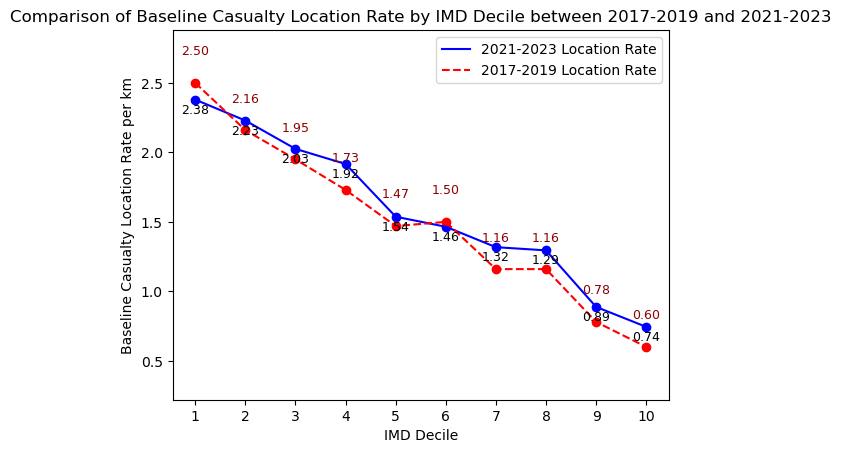

In [50]:
plt.scatter(coll['IMD Decile'], coll['location_rate'], color='blue')
plt.plot(coll['IMD Decile'], coll['location_rate'], color='blue', linestyle='-', label='2021-2023 Location Rate')

# Second scatter plot with line (example data for a second dataset)
# Replace `median_values` with your second dataset values
plt.scatter(df2['IMD Decile'], df2['average'], color='red')
plt.plot(df2['IMD Decile'], df2['average'], color='red', linestyle='--', label='2017-2019 Location Rate')

for i in range(len(coll)):
    plt.text(
        coll['IMD Decile'][i],                # x-coordinate of the point
        coll['location_rate'][i] -0.1,            # y-coordinate slightly above the point
        f"{coll['location_rate'][i]:.2f}",         # Text to display (formatted to 2 decimals)
        ha='center',                               # Horizontal alignment
        fontsize=9,                                # Font size
        color='black'                              # Text color
    )
    plt.text(
        df2['IMD Decile'][i], 
        df2['average'][i] + 0.2, 
        f"{df2['average'][i]:.2f}", 
        ha='center', fontsize=9, color='darkred'
    )

plt.xticks(ticks=range(1, 11))
# Add labels, title, and legend
plt.xlabel('IMD Decile')
plt.ylabel('Baseline Casualty Location Rate per km')
plt.title('Comparison of Baseline Casualty Location Rate by IMD Decile between 2017-2019 and 2021-2023')
plt.legend()

plt.margins(y=0.2) 

# Show the plot
plt.show()

In [42]:
ranges = {
    '13': [1, 2, 3],
    '47': [4, 5, 6, 7],
    '8-10': [8, 9, 10]
}
# Create a new DataFrame with the average for each range
newdata = {
    'Range': [],
    'Average': []
}

for key, value in ranges.items():
    avg = coll[coll['IMD Decile'].isin(value)]['location_rate'].mean()
    newdata['Range'].append(key)
    newdata['Average'].append(avg)

# Convert the result into a DataFrame
new_df = pd.DataFrame(newdata)

print(new_df)

  Range   Average
0    13  2.211295
1    47  1.559134
2   810  0.975774


In [86]:
collision1 = pd.read_csv("data/dft-road-casualty-statistics-collision-last-5-years.csv", dtype=dtype_dict)

mask = collision1['lsoa_of_accident_location'] == '-1'
collision1 = collision1[~mask]
collision1

filtered_collision = collision1[collision1['lsoa_of_accident_location'].isin(lsoa_list)]

filtered_collision = filtered_collision[['number_of_casualties','lsoa_of_accident_location','accident_year']].rename(columns={'lsoa_of_accident_location': 'lsoa'})
summed_counts = filtered_collision.groupby(['lsoa', 'accident_year'])['number_of_casualties'].sum().reset_index()
# Rename columns for clarity (optional)
summed_counts.columns = ['lsoa', 'year','count']

coll = pd.merge(summed_counts, imd, on='lsoa', how='left')
coll['location_rate'] = (coll['count'] / coll['Road Length'] ) *1000

coll2019 = coll[coll['year'] == 2019]
coll2020 = coll[coll['year'] == 2020]
coll2021 = coll[coll['year'] == 2021]
coll2022 = coll[coll['year'] == 2022]
coll2023 = coll[coll['year'] == 2023]

In [100]:
coll2019

,lsoa,year,count,Census Year,Road Length,Population,IMD Decile,location_rate
0,E01000001,2019,14,2021,2855.474246,1475,9,4.902863
5,E01000002,2019,8,2021,4288.325821,1384,10,1.865530
10,E01000003,2019,1,2021,1073.346027,1616,5,0.931666
12,E01000005,2019,8,2021,4528.304022,1103,3,1.766666
20,E01000007,2019,17,2021,4374.712212,2908,3,3.885970
...,...,...,...,...,...,...,...,...
20318,E01033741,2019,7,2021,8134.249199,2698,5,0.860559
20323,E01033743,2019,2,2021,5520.035242,1941,5,0.362317
20325,E01033744,2019,7,2021,3063.978880,1803,3,2.284611
20329,E01033745,2019,5,2021,9274.556671,1783,4,0.539109


In [101]:
coll2020

,lsoa,year,count,Census Year,Road Length,Population,IMD Decile,location_rate
1,E01000001,2020,8,2021,2855.474246,1475,9,2.801636
6,E01000002,2020,1,2021,4288.325821,1384,10,0.233191
13,E01000005,2020,7,2021,4528.304022,1103,3,1.545833
17,E01000006,2020,2,2021,2703.273461,1845,5,0.739844
21,E01000007,2020,15,2021,4374.712212,2908,3,3.428797
...,...,...,...,...,...,...,...,...
20315,E01033739,2020,2,2021,860.129908,1726,5,2.325230
20319,E01033741,2020,8,2021,8134.249199,2698,5,0.983496
20326,E01033744,2020,3,2021,3063.978880,1803,3,0.979119
20330,E01033745,2020,10,2021,9274.556671,1783,4,1.078219


In [94]:
rate1 = coll2021["location_rate"].mean()
rate1

1.675462446065983

In [95]:
rate1 = coll2022["location_rate"].mean()
rate1

1.667185556248692

In [115]:
ranges = {
    'Most Deprived 30%': [1, 2, 3],
    'Middle Deprivation 40%': [4, 5, 6, 7],
    'Least Deprived 30%': [8, 9, 10]
}
# Create a new DataFrame with the average for each range
newdata = {
    'Range': [],
    '2022': []
}

for key, value in ranges.items():
    avg = coll2022[coll2022['IMD Decile'].isin(value)]['location_rate'].mean()
    newdata['Range'].append(key)
    newdata['2022'].append(avg)

# Convert the result into a DataFrame
df1 = pd.DataFrame(newdata)


# Create a new DataFrame with the average for each range
newdata1 = {
    'Range': [],
    '2023': []
}

for key, value in ranges.items():
    avg = coll2023[coll2023['IMD Decile'].isin(value)]['location_rate'].mean()
    newdata1['Range'].append(key)
    newdata1['2023'].append(avg)

# Convert the result into a DataFrame
df2 = pd.DataFrame(newdata1)

newdata2 = {
    'Range': [],
    '2021': []
}

for key, value in ranges.items():
    avg = coll2021[coll2021['IMD Decile'].isin(value)]['location_rate'].mean()
    newdata2['Range'].append(key)
    newdata2['2021'].append(avg)

# Convert the result into a DataFrame
df3 = pd.DataFrame(newdata2)


newdata3 = {
    'Range': [],
    '2019': []
}

for key, value in ranges.items():
    avg = coll2019[coll2019['IMD Decile'].isin(value)]['location_rate'].mean()
    newdata3['Range'].append(key)
    newdata3['2019'].append(avg)

# Convert the result into a DataFrame
df4 = pd.DataFrame(newdata3)

newdata4 = {
    'Range': [],
    '2020': []
}

for key, value in ranges.items():
    avg = coll2020[coll2020['IMD Decile'].isin(value)]['location_rate'].mean()
    newdata4['Range'].append(key)
    newdata4['2020'].append(avg)

# Convert the result into a DataFrame
df5 = pd.DataFrame(newdata4)

In [116]:
from functools import reduce
dataframes = [df1, df2, df3, df4, df5]

# Merge all DataFrames on the common column "ID"
merged_df = reduce(lambda left, right: pd.merge(left, right, on="Range"), dataframes)


In [117]:
merged_df

,Range,2022,2023,2021,2019,2020
0,Most Deprived 30%,2.119497,2.107211,2.182897,2.327226,1.980255
1,Middle Deprivation 40%,1.613020,1.567598,1.595797,1.723560,1.485649
2,Least Deprived 30%,1.055138,1.028552,1.014875,1.134187,0.979861


In [118]:
df5

,Range,2020
0,Most Deprived 30%,1.980255
1,Middle Deprivation 40%,1.485649
2,Least Deprived 30%,0.979861


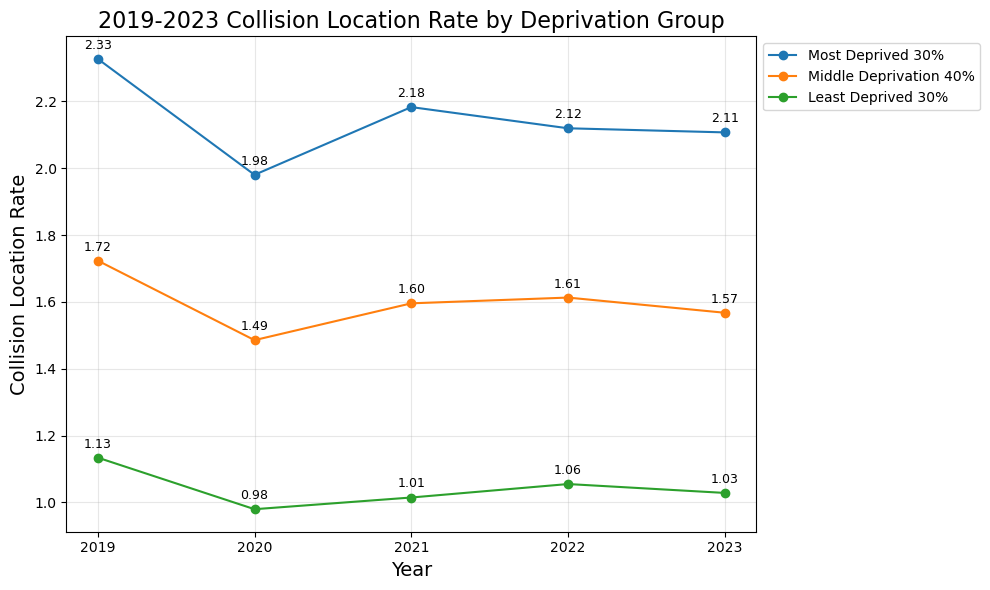

In [125]:
sorted_years = sorted(["2019", "2020", "2021", "2022", "2023"])
merged_df = merged_df[["Range"] + sorted_years]

df_melted = merged_df.melt(id_vars="Range", var_name="Year", value_name="Value")



# Plot the data
plt.figure(figsize=(10, 6))

for range_value in merged_df["Range"]:
    # Filter data for each range
    range_data = df_melted[df_melted["Range"] == range_value]
    plt.plot(range_data["Year"], range_data["Value"], marker="o", label=range_value)

for i in range(len(df_melted)):
    plt.text(
        df_melted['Year'][i],                # x-coordinate of the point
        df_melted['Value'][i] + 0.03,            # y-coordinate slightly above the point
        f"{df_melted['Value'][i]:.2f}",         # Text to display (formatted to 2 decimals)
        ha='center',                               # Horizontal alignment
        fontsize=9,                                # Font size
        color='black'                              # Text color
    )

# Customize the plot
plt.title("2019-2023 Collision Location Rate by Deprivation Group", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Collision Location Rate", fontsize=14)
plt.legend(title="Deprivation Level", fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

In [83]:
df_melted

,Range,Year,Value
0,13,2022,2.119497
1,47,2022,1.613020
2,8-10,2022,1.055138
3,13,2023,2.107211
4,47,2023,1.567598
5,8-10,2023,1.028552
6,13,2021,2.182897
7,47,2021,1.595797
8,8-10,2021,1.014875
9,13,2019,2.182897


# Regression model for casualty location rate with other variables such as access to green space, PTAL etc. 

In [108]:
pop = pd.read_csv("data/population_density.csv")
ptal = pd.read_csv("data/ptal2.csv")
green = pd.read_csv("data/greenspace.csv")

dataframes = [pop, ptal]

# Loop through each dataframe
for i, item in enumerate(dataframes):
    item.dropna(subset=['lsoa'], inplace=True)   # Drop rows with NaN in 'lsoa'
    item['lsoa'] = item['lsoa'].str[:9]  # Truncate 'lsoa' to first 9 characters
    item = item[item['lsoa'].isin(lsoa_list)] 
    print(f"After filtering: {item.shape[0]} rows")

pop = pop[pop['lsoa'].isin(lsoa_list)] 
ptal = ptal[ptal['lsoa'].isin(lsoa_list)] 
green = green[green['lsoa'].isin(lsoa_list)] 

print(f"Final shape of pop: {pop.shape}")
print(f"Final shape of econ: {ptal.shape}")



After filtering: 4994 rows
After filtering: 4659 rows
Final shape of pop: (4994, 2)
Final shape of econ: (4659, 5)


In [109]:
pop

,lsoa,2021
19783,E01000001,"11,363.6"
19784,E01000002,"6,062.2"
19785,E01000003,"27,385.4"
19786,E01000005,"5,801.7"
19787,E01032739,983.9
...,...,...
24772,E01004665,"30,397.5"
24773,E01004669,"23,902.8"
24774,E01004737,"15,074.3"
24775,E01004741,"22,895.2"


In [110]:
green1 = green.groupby("lsoa")[['Household count', 'Household with access count']].sum()
green1['percent'] = green1['Household with access count'] / green1['Household count']
green1

,Household count,Household with access count,percent
lsoa,,,
E01000001,1070,0,0.000000
E01000002,1170,0,0.000000
E01000003,1288,0,0.000000
E01000005,1135,0,0.000000
E01000006,573,55,0.095986
...,...,...,...
E01035718,1951,901,0.461814
E01035719,964,0,0.000000
E01035720,742,0,0.000000


In [111]:
locationmodel = pd.merge(coll2, green1, on='lsoa', how='left')
locationmodel = pd.merge(locationmodel, pop, on='lsoa', how='left')
locationmodel = pd.merge(locationmodel, ptal, on='lsoa', how='left')
locationmode2 = locationmodel[['IMD Decile', 'location_rate', 'percent', 'AvPTAI2015', 'PTAIHigh', 'PTAILow', '2021']].rename(columns={'2021': 'popden'})
locationmode2['popden'] = locationmode2['popden'].str.replace(',', '', regex=False)  # Remove commas
locationmode2['popden'] = pd.to_numeric(locationmode2['popden'], errors='coerce')
locationmode2

,IMD Decile,location_rate,percent,AvPTAI2015,PTAIHigh,PTAILow,popden
0,9,1.400818,0.000000,69.82330,97.4435,35.9190,11363.6
1,9,0.700409,0.000000,69.82330,97.4435,35.9190,11363.6
2,9,2.451432,0.000000,69.82330,97.4435,35.9190,11363.6
3,10,0.932765,0.000000,83.78200,117.9120,66.3503,6062.2
4,10,1.865530,0.000000,83.78200,117.9120,66.3503,6062.2
...,...,...,...,...,...,...,...
12209,4,2.695547,0.000000,4.68378,11.4851,0.0000,3161.3
12210,4,0.323466,0.000000,4.68378,11.4851,0.0000,3161.3
12211,4,1.841457,0.269608,18.98820,24.1235,14.5436,11582.7
12212,4,0.306910,0.269608,18.98820,24.1235,14.5436,11582.7


In [117]:
import statsmodels.api as sm

# Fit the OLS model
model4 = sm.OLS(endog=locationmode2[['location_rate']], 
               exog=sm.add_constant(locationmode2[['percent', 'AvPTAI2015','PTAIHigh', 'PTAILow', 'popden','IMD Decile']]))

# Fit the model and store the results
results = model4.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          location_rate   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     726.1
Date:                Wed, 04 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:58:55   Log-Likelihood:                -21420.
No. Observations:               12214   AIC:                         4.285e+04
Df Residuals:                   12207   BIC:                         4.291e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0978      0.050     21.864      0.000       0.999       1.196
percent        0.1222      0.050      2.463      0.014       0.025       0.219
AvPTAI2015     0.0262      0.005      4.838      0.000       0.016       0.037
PTAIHigh       0.0113      0.003      3.930      0.000       0.006       0.017
PTAILow        0.0102      0.004      2.827      0.005       0.003       0.017
popden      4.002e-05   2.59e-06     15.463      0.000    3.49e-05    4.51e-05
IMD Decile    -0.1046      0.006    -18.541      0.000      -0.116      -0.094
==============================================================================
Omnibus:                     6456.419   Durbin-Watson:                   1.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            85975.952
Skew:                           2.237   Prob(JB):                         0.00
Kurtosis:                      15.203   Cond. No.                     5.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Multi regression model to look at population characterstics and how it affects KSI rates 

In [134]:
casualty = pd.read_csv('data/dft-road-casualty-statistics-casualty-last-5-years.csv', dtype=dtype_dict)

mask = casualty['lsoa_of_casualty'] == '-1'
casualty = casualty[~mask]
filtered_casualty = casualty[casualty['lsoa_of_casualty'].isin(lsoa_list)]

mask = filtered_casualty['sex_of_casualty'] == '-1'
df = filtered_casualty[~mask]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115240 entries, 0 to 665229
Data columns (total 21 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   accident_index                      115240 non-null  object
 1   accident_year                       115240 non-null  int64 
 2   accident_reference                  115240 non-null  object
 3   vehicle_reference                   115240 non-null  int64 
 4   casualty_reference                  115240 non-null  int64 
 5   casualty_class                      115240 non-null  int64 
 6   sex_of_casualty                     115240 non-null  int64 
 7   age_of_casualty                     115240 non-null  int64 
 8   age_band_of_casualty                115240 non-null  int64 
 9   casualty_severity                   115240 non-null  int64 
 10  pedestrian_location                 115240 non-null  int64 
 11  pedestrian_movement                 115240 n

# need to split casualty type by bus,coach; car; goods vehicle, pedal cycle,, pedestrian, powered2wheeler, private-hire, age, deprivation level, and sex


In [135]:
df = df[df['sex_of_casualty'] != -1]
df = df[df['age_of_casualty'] != -1]
df = df[df['sex_of_casualty'] != 9]

df['sex_of_casualty'] = df['sex_of_casualty'].replace(2, 0)
unique_values = df['sex_of_casualty'].unique()
unique_values
# 1 is male, 0 is female 

array([1, 0])

In [136]:
 df = df[df['casualty_severity'] != 3]
# drop slight injuries 

In [137]:
df1 = df[['casualty_severity','lsoa_of_casualty','accident_year','sex_of_casualty', 'age_of_casualty', 'casualty_type', 'casualty_imd_decile']].rename(columns={'lsoa_of_casualty': 'lsoa'})
df2 = df1

In [138]:
#0 pedestrian 
#1 cyclist 
#2 start grouping all powered 2 wheelers 
df2['casualty_type'] = df2['casualty_type'].replace(3, 2)
df2['casualty_type'] = df2['casualty_type'].replace(4, 2)
df2['casualty_type'] = df2['casualty_type'].replace(5, 2)
df2['casualty_type'] = df2['casualty_type'].replace(22, 2)
df2['casualty_type'] = df2['casualty_type'].replace(23, 2)
df2['casualty_type'] = df2['casualty_type'].replace(97, 2)

# 3 goods 
df2['casualty_type'] = df2['casualty_type'].replace(19, 3)
df2['casualty_type'] = df2['casualty_type'].replace(20, 3)
df2['casualty_type'] = df2['casualty_type'].replace(98, 3)
df2['casualty_type'] = df2['casualty_type'].replace(21, 3)

#90 - others 
df2['casualty_type'] = df2['casualty_type'].replace(16, 90)
#8 - taxi/private hire  
#9 - car

#10 - bus/coach 
df2['casualty_type'] = df2['casualty_type'].replace(11, 10)


In [139]:
unique_values = df2['casualty_type'].unique()
unique_values.sort()
unique_values

array([ 0,  1,  2,  3,  8,  9, 10, 90])

In [140]:
unique_values = df2['age_of_casualty'].unique()
unique_values.sort()
unique_values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 98])

# previous model is probably wrong because the way the casualty rate is calculated aggregated without considering age, sex, and casualty type. 

grouping based on age groups, deprivation level 

In [141]:
df2[['count']] = 1
df2

,casualty_severity,lsoa,accident_year,sex_of_casualty,age_of_casualty,casualty_type,casualty_imd_decile,count
5,2,E01000965,2019,1,68,0,4,1
24,2,E01004296,2019,1,22,0,2,1
27,2,E01001083,2019,1,26,8,6,1
36,2,E01003308,2019,1,20,2,4,1
38,2,E01004239,2019,1,12,1,2,1
...,...,...,...,...,...,...,...,...
654268,2,E01004471,2023,0,74,9,2,1
654816,2,E01004251,2023,1,20,9,2,1
658450,2,E01000346,2023,1,36,2,9,1
658636,1,E01003182,2023,1,67,2,3,1


In [142]:
bins = [0, 4, 19, 29, 59, 69, 100]  # The edges of the ranges
labels = ['0-4', '5-19', '20-29', '30-59', '60-69', '70+']  # Labels for the ranges

# Create a new column with the ranges
df2['age_range'] = pd.cut(df2['age_of_casualty'], bins=bins, labels=labels, right=True)

# Group by the ranges and sum column 'A'
range_sums = df2.groupby(['lsoa','sex_of_casualty','casualty_type','age_range'])['count'].sum().reset_index()
range_sums

/tmp/ipykernel_2140/1018290402.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  range_sums = df2.groupby(['lsoa','sex_of_casualty','casualty_type','age_range'])['count'].sum().reset_index()


,lsoa,sex_of_casualty,casualty_type,age_range,count
0,E01000001,0,0,0-4,0
1,E01000001,0,0,5-19,0
2,E01000001,0,0,20-29,0
3,E01000001,0,0,30-59,1
4,E01000001,0,0,60-69,0
...,...,...,...,...,...
423451,E01033745,1,90,5-19,0
423452,E01033745,1,90,20-29,0
423453,E01033745,1,90,30-59,0
423454,E01033745,1,90,60-69,0


In [143]:
print(range_sums['count'].min())
print(range_sums['count'].max())

0
5


In [170]:
malepop = pd.read_csv("data/malepop.csv")
dataframes = [malepop]

# Loop through each dataframe
for i, item in enumerate(dataframes):
    item.dropna(subset=['lsoa'], inplace=True)   # Drop rows with NaN in 'lsoa'
    item['lsoa'] = item['lsoa'].str[:9]  # Truncate 'lsoa' to first 9 characters
    item = item[item['lsoa'].isin(lsoa_list)] 
    print(f"After filtering: {item.shape[0]} rows")


df4 = pd.merge(range_sums, malepop, on='lsoa', how='left')

df4 = df4.rename(columns={'Age 0 - 4': 'm0-4'})
df4['5-19'] =  df4['Aged 5-9'] + df4['Aged 15-19']
df4['20-29'] =  df4['Aged 20-24'] + df4['Aged 25-29']
df4['30-59'] =  df4['Aged 30-34'] + df4['Aged 35-39'] + df4['Aged 40-44'] +df4['Aged 45-49']+df4['Aged 50-54']+df4['Aged 55-59']
df4['60-69'] =  df4['Aged 60-64'] + df4['Aged 65-69']
df4['70+'] =  df4['Aged 70-74'] + df4['Aged 75-79'] + df4['Aged 80-84'] +df4['Aged 85+']
df4 = df4.drop(df4.filter(like='Aged').columns, axis=1)

femalepop = pd.read_csv("data/femalepop.csv")
dataframes1 = [femalepop]

# Loop through each dataframe
for i, item in enumerate(dataframes1):
    item.dropna(subset=['lsoa'], inplace=True)   # Drop rows with NaN in 'lsoa'
    item['lsoa'] = item['lsoa'].str[:9]  # Truncate 'lsoa' to first 9 characters
    item = item[item['lsoa'].isin(lsoa_list)] 
    print(f"After filtering: {item.shape[0]} rows")

df4 = pd.merge(df4, femalepop, on='lsoa', how='left')
df4 = df4.rename(columns={'Age 0 - 4': 'f0-4'})
df4['f5-19'] =  df4['Aged 5-9'] + df4['Aged 15-19']
df4['f20-29'] =  df4['Aged 20-24'] + df4['Aged 25-29']
df4['f30-59'] =  df4['Aged 30-34'] + df4['Aged 35-39'] + df4['Aged 40-44'] +df4['Aged 45-49']+df4['Aged 50-54']+df4['Aged 55-59']
df4['f60-69'] =  df4['Aged 60-64'] + df4['Aged 65-69']
df4['f70+'] =  df4['Aged 70-74'] + df4['Aged 75-79'] + df4['Aged 80-84'] +df4['Aged 85+']
df4 = df4.drop(df4.filter(like='Aged').columns, axis=1)
df4

After filtering: 4994 rows
After filtering: 4994 rows


,lsoa,sex_of_casualty,casualty_type,age_range,count,m0-4,5-19,20-29,30-59,60-69,70+,f0-4,f5-19,f20-29,f30-59,f60-69,f70+
0,E01000001,0,0,0-4,0,33,41,185,463,101,162,31,45,136,318,106,151
1,E01000001,0,0,5-19,0,33,41,185,463,101,162,31,45,136,318,106,151
2,E01000001,0,0,20-29,0,33,41,185,463,101,162,31,45,136,318,106,151
3,E01000001,0,0,30-59,1,33,41,185,463,101,162,31,45,136,318,106,151
4,E01000001,0,0,60-69,0,33,41,185,463,101,162,31,45,136,318,106,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423451,E01033745,1,90,5-19,0,83,140,91,343,51,20,46,122,103,435,74,14
423452,E01033745,1,90,20-29,0,83,140,91,343,51,20,46,122,103,435,74,14
423453,E01033745,1,90,30-59,0,83,140,91,343,51,20,46,122,103,435,74,14
423454,E01033745,1,90,60-69,0,83,140,91,343,51,20,46,122,103,435,74,14


In [171]:
imd = pd.read_csv("data/lsoa-reference-data.csv")
imd = imd[['LSOA Code','Census Year','IMD Decile']]
imd = imd[imd['Census Year'] == 2021]
imd = imd.rename(columns={'LSOA Code': 'lsoa'})
imd = imd[['lsoa','IMD Decile']]
df4 = pd.merge(df4, imd, on='lsoa', how='left')

aggregated = df4.groupby(['lsoa', 'IMD Decile'], as_index=False).first()
# Step 2: Group by 'imd' and sum the population
result = aggregated.groupby('IMD Decile', as_index=False)[[
'm0-4', '5-19', '20-29', '30-59', '60-69', '70+','f0-4','f5-19', 'f20-29','f30-59','f60-69','f70+']].sum()
result
columns_to_drop = ['m0-4', '5-19', '20-29', '30-59', '60-69', '70+','f0-4','f5-19', 'f20-29','f30-59','f60-69','f70+']
df4 = df4.drop(columns=columns_to_drop)
df4

,lsoa,sex_of_casualty,casualty_type,age_range,count,IMD Decile
0,E01000001,0,0,0-4,0,9
1,E01000001,0,0,5-19,0,9
2,E01000001,0,0,20-29,0,9
3,E01000001,0,0,30-59,1,9
4,E01000001,0,0,60-69,0,9
...,...,...,...,...,...,...
423451,E01033745,1,90,5-19,0,4
423452,E01033745,1,90,20-29,0,4
423453,E01033745,1,90,30-59,0,4
423454,E01033745,1,90,60-69,0,4


In [175]:
result

,IMD Decile,m0-4,5-19,20-29,30-59,60-69,70+,f0-4,f5-19,f20-29,f30-59,f60-69,f70+
0,1,5568,12162,13922,33942,6546,4498,5243,11736,14556,40313,7394,6515
1,2,36307,78657,95561,234571,43932,30072,34962,75647,102100,266627,48000,42416
2,3,43445,86403,112267,285690,50958,37767,42415,82422,118924,310143,55279,51647
3,4,35295,66465,97393,247403,43705,35384,33831,62861,103074,259627,46230,46646
4,5,29277,54346,73599,207902,38172,33731,27832,52398,77988,216687,41152,44636
5,6,26114,48684,62613,185515,36233,35294,24621,46868,68289,194585,38711,45851
6,7,19862,37533,47612,145130,30668,32398,18924,36080,50712,154112,32440,41726
7,8,17644,33870,40218,131386,28666,32637,16798,32144,42883,138310,30500,40789
8,9,16817,34071,32930,122802,29831,35897,16189,32602,35117,132621,32234,44442
9,10,8684,19530,14176,62694,16072,20283,7973,18043,14688,67690,17209,24574


In [176]:
df4 = df4.groupby(['IMD Decile','sex_of_casualty','casualty_type','age_range'])['count'].sum().reset_index()
df4 = df4 = pd.merge(df4, result, on='IMD Decile', how='left')
df4

/tmp/ipykernel_2140/3359986239.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df4 = df4.groupby(['IMD Decile','sex_of_casualty','casualty_type','age_range'])['count'].sum().reset_index()


,IMD Decile,sex_of_casualty,casualty_type,age_range,count,m0-4,5-19,20-29,30-59,60-69,70+,f0-4,f5-19,f20-29,f30-59,f60-69,f70+
0,1,0,0,0-4,0,5568,12162,13922,33942,6546,4498,5243,11736,14556,40313,7394,6515
1,1,0,0,5-19,10,5568,12162,13922,33942,6546,4498,5243,11736,14556,40313,7394,6515
2,1,0,0,20-29,10,5568,12162,13922,33942,6546,4498,5243,11736,14556,40313,7394,6515
3,1,0,0,30-59,24,5568,12162,13922,33942,6546,4498,5243,11736,14556,40313,7394,6515
4,1,0,0,60-69,5,5568,12162,13922,33942,6546,4498,5243,11736,14556,40313,7394,6515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,10,1,90,5-19,1,8684,19530,14176,62694,16072,20283,7973,18043,14688,67690,17209,24574
956,10,1,90,20-29,1,8684,19530,14176,62694,16072,20283,7973,18043,14688,67690,17209,24574
957,10,1,90,30-59,1,8684,19530,14176,62694,16072,20283,7973,18043,14688,67690,17209,24574
958,10,1,90,60-69,0,8684,19530,14176,62694,16072,20283,7973,18043,14688,67690,17209,24574


In [177]:
def get_population(row):
    if row['sex_of_casualty'] == 1:
        if row['age_range'] == '0-4' :
            return row['m0-4']
        elif row['age_range'] == '5-19':
            return row['5-19']
        elif row['age_range'] == '20-29':
            return row['20-29']
        elif row['age_range'] == '30-59':
            return row['30-59']
        elif row['age_range'] == '60-69':
            return row['60-69']
        elif row['age_range'] == '70+':
            return row['70+']
    elif row['sex_of_casualty'] == 0:
        if row['age_range'] == '0-4':
            return row['f0-4']
        elif row['age_range'] == '5-19':
            return row['f5-19']
        elif row['age_range'] == '20-29':
            return row['f20-29']
        elif row['age_range'] == '30-59':
            return row['f30-59']
        elif row['age_range'] == '60-69':
            return row['f60-69']
        elif row['age_range'] == '70+':
            return row['f70+']
    return None  # Default case if no match

# Apply the function to create a new column for population
df4['population'] = df4.apply(get_population, axis=1)
df4['rate'] = 1000* df4['count'] / df4['population']

In [178]:
print(df4['count'].min())
print(df4['count'].max())

0
346


In [179]:
df4 = df4[df4['rate'] != 0]
df4


,IMD Decile,sex_of_casualty,casualty_type,age_range,count,m0-4,5-19,20-29,30-59,60-69,70+,f0-4,f5-19,f20-29,f30-59,f60-69,f70+,population,rate
1,1,0,0,5-19,10,5568,12162,13922,33942,6546,4498,5243,11736,14556,40313,7394,6515,11736,0.852079
2,1,0,0,20-29,10,5568,12162,13922,33942,6546,4498,5243,11736,14556,40313,7394,6515,14556,0.687002
3,1,0,0,30-59,24,5568,12162,13922,33942,6546,4498,5243,11736,14556,40313,7394,6515,40313,0.595341
4,1,0,0,60-69,5,5568,12162,13922,33942,6546,4498,5243,11736,14556,40313,7394,6515,7394,0.676224
5,1,0,0,70+,7,5568,12162,13922,33942,6546,4498,5243,11736,14556,40313,7394,6515,6515,1.074444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,10,1,10,60-69,1,8684,19530,14176,62694,16072,20283,7973,18043,14688,67690,17209,24574,16072,0.062220
953,10,1,10,70+,1,8684,19530,14176,62694,16072,20283,7973,18043,14688,67690,17209,24574,20283,0.049302
955,10,1,90,5-19,1,8684,19530,14176,62694,16072,20283,7973,18043,14688,67690,17209,24574,19530,0.051203
956,10,1,90,20-29,1,8684,19530,14176,62694,16072,20283,7973,18043,14688,67690,17209,24574,14176,0.070542


In [180]:
df_dummies = pd.get_dummies(df4['casualty_type'], prefix='mode', drop_first=False)
df_dummies = df_dummies.astype(int)
# Add the dummy variables to the original DataFrame
df4 = pd.concat([df4, df_dummies], axis=1)
df4['age_range'] = df4['age_range'].replace('0-4', '1')
df4['age_range'] = df4['age_range'].replace('5-19', '2')
df4['age_range'] = df4['age_range'].replace('20-29', '3')
df4['age_range'] = df4['age_range'].replace('30-59', '4')
df4['age_range'] = df4['age_range'].replace('60-69', '5')
df4['age_range'] = df4['age_range'].replace('70+', '6')
df4['age_range'] = pd.to_numeric(df4['age_range'], errors='coerce')

df_dummies = pd.get_dummies(df4['age_range'], prefix='age', drop_first=False)
df_dummies = df_dummies.astype(int)
# Add the dummy variables to the original DataFrame
df4 = pd.concat([df4, df_dummies], axis=1)
df4

/tmp/ipykernel_2140/410025555.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df4['age_range'] = df4['age_range'].replace('0-4', '1')
/tmp/ipykernel_2140/410025555.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df4['age_range'] = df4['age_range'].replace('5-19', '2')
/tmp/ipykernel_2140/410025555.py:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead

,IMD Decile,sex_of_casualty,casualty_type,age_range,count,m0-4,5-19,20-29,30-59,60-69,...,mode_8,mode_9,mode_10,mode_90,age_1,age_2,age_3,age_4,age_5,age_6
1,1,0,0,2,10,5568,12162,13922,33942,6546,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,3,10,5568,12162,13922,33942,6546,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,4,24,5568,12162,13922,33942,6546,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,5,5,5568,12162,13922,33942,6546,...,0,0,0,0,0,0,0,0,1,0
5,1,0,0,6,7,5568,12162,13922,33942,6546,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,10,1,10,5,1,8684,19530,14176,62694,16072,...,0,0,1,0,0,0,0,0,1,0
953,10,1,10,6,1,8684,19530,14176,62694,16072,...,0,0,1,0,0,0,0,0,0,1
955,10,1,90,2,1,8684,19530,14176,62694,16072,...,0,0,0,1,0,1,0,0,0,0
956,10,1,90,3,1,8684,19530,14176,62694,16072,...,0,0,0,1,0,0,1,0,0,0


In [181]:
has_nan = df4.isna().any().any()
print(f"DataFrame contains NaN: {has_nan}")

DataFrame contains NaN: False


In [182]:
import statsmodels.api as sm

# Fit the OLS model
model = sm.OLS(endog=df4[['rate']], 
               exog=sm.add_constant(df4[['sex_of_casualty', 'IMD Decile','age_1', 'age_2', 'age_3','age_4','age_5',
                         'mode_0', 'mode_1', 'mode_2', 'mode_3', 'mode_8', 'mode_9', 'mode_10']]))

# Fit the model and store the results
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     42.80
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           4.55e-81
Time:                        12:56:41   Log-Likelihood:                -113.96
No. Observations:                 624   AIC:                             257.9
Df Residuals:                     609   BIC:                             324.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0634      0.058     -1.088      0.277      -0.178       0.051
sex_of_casualty     0.2414      0.024     10.148      0.000       0.195       0.288
IMD Decile         -0.0141      0.004     -3.289      0.001      -0.023      -0.006
age_1              -0.3963      0.057     -6.991      0.000      -0.508      -0.285
age_2              -0.0231      0.043     -0.541      0.589      -0.107       0.061
age_3               0.1691      0.040      4.241      0.000       0.091       0.247
age_4               0.0366      0.039      0.941      0.347      -0.040       0.113
age_5              -0.0631      0.041     -1.534      0.126      -0.144       0.018
mode_0              0.7167      0.050     14.278      0.000       0.618       0.815
mode_1              0.5002      0.051      9.785      0.000       0.400       0.601
mode_2              0.4858      0.052      9.291      0.000       0.383       0.588
mode_3             -0.0502      0.063     -0.793      0.428      -0.174       0.074
mode_8             -0.0064      0.060     -0.106      0.916      -0.124       0.112
mode_9              0.3616      0.050      7.186      0.000       0.263       0.460
mode_10             0.1282      0.054      2.390      0.017       0.023       0.234
==============================================================================
Omnibus:                      235.251   Durbin-Watson:                   1.288
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1184.206
Skew:                           1.623   Prob(JB):                    7.13e-258
Kurtosis:                       8.917   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
test_rainbow = statsmodels.stats.diagnostic.linear_rainbow(results)
# This function returns a tuple consisting of two values: the test statistic based on the F test and the pvalue of the test
# Note that these two values are not named. Therefore, you need to know the order before accessing these two values.
print("The p value of the rainbow test: {:.100f}".format(test_rainbow[1]))

The p value of the rainbow test: 0.0303831134448570468198358440758966025896370410919189453125000000000000000000000000000000000000000000


In [188]:
sorted_df = df4.sort_values(by='rate', ascending=False)
print(sorted_df.tail(20))

     IMD Decile  sex_of_casualty  casualty_type  age_range  count   m0-4  \
374           4                1             10          3      1  35295   
122           2                0              8          3      1  36307   
308           4                0              3          3      1  35295   
219           3                0              8          4      3  43445   
405           5                0              3          4      2  29277   
411           5                0              8          4      2  29277   
278           3                1             10          3      1  43445   
212           3                0              3          3      1  43445   
230           3                0             10          3      1  43445   
861           9                1             90          4      1  16817   
315           4                0              8          4      2  35295   
333           4                0             90          4      2  35295   
309         

In [187]:
sorted_df['rate']

62     2.657664
158    2.480091
254    2.209020
638    1.974292
350    1.920056
         ...   
699    0.007230
651    0.006890
213    0.006449
507    0.005139
525    0.005139
Name: rate, Length: 624, dtype: float64

## ignore here from now; still wrong way to calculate need to group based on age group, sex and deprivation group, WITHOUT lsoa 
6x2x10 possible groups 


120 possible population groups basically 


In [118]:
df4 

NameError: name 'df4' is not defined

In [137]:
df5 = df4[['IMD Decile' ,'m0-4', '5-19', '20-29', '30-59', '60-69', '70+','f0-4','f5-19', 'f20-29','f30-59','f60-69','f70+']].groupby('IMD Decile')[[
'm0-4', '5-19', '20-29', '30-59', '60-69', '70+','f0-4','f5-19', 'f20-29','f30-59','f60-69','f70+']].sum()

dff = df2.groupby(['casualty_imd_decile','sex_of_casualty','casualty_type','age_range'])['count'].sum().reset_index()

df6 = dff.merge(df5, left_on='casualty_imd_decile', right_on='IMD Decile', suffixes=('_old', ''))
df6

/tmp/ipykernel_194/2723387610.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dff = df2.groupby(['casualty_imd_decile','sex_of_casualty','casualty_type','age_range'])['count'].sum().reset_index()


,casualty_imd_decile,sex_of_casualty,casualty_type,age_range,count,m0-4,5-19,20-29,30-59,60-69,70+,f0-4,f5-19,f20-29,f30-59,f60-69,f70+
0,1,0,0,0-4,1,20788,45800,53724,128852,24764,16731,19734,44465,56487,151737,26887,24191
1,1,0,0,5-19,30,20788,45800,53724,128852,24764,16731,19734,44465,56487,151737,26887,24191
2,1,0,0,20-29,26,20788,45800,53724,128852,24764,16731,19734,44465,56487,151737,26887,24191
3,1,0,0,30-59,55,20788,45800,53724,128852,24764,16731,19734,44465,56487,151737,26887,24191
4,1,0,0,60-69,22,20788,45800,53724,128852,24764,16731,19734,44465,56487,151737,26887,24191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,10,1,90,5-19,1,20899,45802,33770,148528,38089,47624,19208,43205,35231,160534,40695,57789
956,10,1,90,20-29,0,20899,45802,33770,148528,38089,47624,19208,43205,35231,160534,40695,57789
957,10,1,90,30-59,0,20899,45802,33770,148528,38089,47624,19208,43205,35231,160534,40695,57789
958,10,1,90,60-69,0,20899,45802,33770,148528,38089,47624,19208,43205,35231,160534,40695,57789


In [138]:
def get_population(row):
    if row['sex_of_casualty'] == 1:
        if row['age_range'] == '0-4' :
            return row['m0-4']
        elif row['age_range'] == '5-19':
            return row['5-19']
        elif row['age_range'] == '20-29':
            return row['20-29']
        elif row['age_range'] == '30-59':
            return row['30-59']
        elif row['age_range'] == '60-69':
            return row['60-69']
        elif row['age_range'] == '70+':
            return row['70+']
    elif row['sex_of_casualty'] == 0:
        if row['age_range'] == '0-4':
            return row['f0-4']
        elif row['age_range'] == '5-19':
            return row['f5-19']
        elif row['age_range'] == '20-29':
            return row['f20-29']
        elif row['age_range'] == '30-59':
            return row['f30-59']
        elif row['age_range'] == '60-69':
            return row['f60-69']
        elif row['age_range'] == '70+':
            return row['f70+']
    return None  # Default case if no match

# Apply the function to create a new column for population
df6['population'] = df6.apply(get_population, axis=1)
df6['rate'] = 1000* df6['count'] / df6['population']
df6

,casualty_imd_decile,sex_of_casualty,casualty_type,age_range,count,m0-4,5-19,20-29,30-59,60-69,70+,f0-4,f5-19,f20-29,f30-59,f60-69,f70+,population,rate
0,1,0,0,0-4,1,20788,45800,53724,128852,24764,16731,19734,44465,56487,151737,26887,24191,19734,0.050674
1,1,0,0,5-19,30,20788,45800,53724,128852,24764,16731,19734,44465,56487,151737,26887,24191,44465,0.674688
2,1,0,0,20-29,26,20788,45800,53724,128852,24764,16731,19734,44465,56487,151737,26887,24191,56487,0.460283
3,1,0,0,30-59,55,20788,45800,53724,128852,24764,16731,19734,44465,56487,151737,26887,24191,151737,0.362469
4,1,0,0,60-69,22,20788,45800,53724,128852,24764,16731,19734,44465,56487,151737,26887,24191,26887,0.818239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,10,1,90,5-19,1,20899,45802,33770,148528,38089,47624,19208,43205,35231,160534,40695,57789,45802,0.021833
956,10,1,90,20-29,0,20899,45802,33770,148528,38089,47624,19208,43205,35231,160534,40695,57789,33770,0.000000
957,10,1,90,30-59,0,20899,45802,33770,148528,38089,47624,19208,43205,35231,160534,40695,57789,148528,0.000000
958,10,1,90,60-69,0,20899,45802,33770,148528,38089,47624,19208,43205,35231,160534,40695,57789,38089,0.000000


In [139]:
df6 = df6[df6['rate'] != 0]
sorted_df = df6.sort_values(by='rate', ascending=False)
sorted_df

62     1.973047
57     1.001149
56     0.986524
63     0.985627
61     0.938865
         ...   
218    0.002336
315    0.002183
501    0.001621
429    0.001337
405    0.001337
Name: rate, Length: 618, dtype: float64

In [144]:
sorted_df = df6.sort_values(by='rate', ascending=False)
print(sorted_df.tail(20))

     casualty_imd_decile  sex_of_casualty  casualty_type  age_range  count  \
422                    5                0             10          3      1   
121                    2                0              8          2      1   
181                    2                1             10          2      1   
163                    2                1              3          2      1   
205                    3                0              2          2      1   
333                    4                0             90          4      3   
525                    6                0             90          4      2   
507                    6                0              8          4      2   
855                    9                1             10          4      1   
789                    9                0              3          4      1   
182                    2                1             10          3      1   
308                    4                0              3        

## most at risk groups ranked 1 is male, aged 20-29, living in the most deprived area in London riding motorcycles have the highest killed or seriously injured rate (1.97 killed or seriously injured per 1,000 people), followed by male, aged 30-59, living in the most deprived area in London who are cycling (1.00 killed or seriously injured per 1000 people)

In [141]:
df_dummies = pd.get_dummies(df6['casualty_type'], prefix='mode', drop_first=False)
df_dummies = df_dummies.astype(int)
# Add the dummy variables to the original DataFrame
df6 = pd.concat([df6, df_dummies], axis=1)
df6['age_range'] = df6['age_range'].replace('0-4', '1')
df6['age_range'] = df6['age_range'].replace('5-19', '2')
df6['age_range'] = df6['age_range'].replace('20-29', '3')
df6['age_range'] = df6['age_range'].replace('30-59', '4')
df6['age_range'] = df6['age_range'].replace('60-69', '5')
df6['age_range'] = df6['age_range'].replace('70+', '6')
df6['age_range'] = pd.to_numeric(df6['age_range'], errors='coerce')

df_dummies = pd.get_dummies(df6['age_range'], prefix='age', drop_first=False)
df_dummies = df_dummies.astype(int)
# Add the dummy variables to the original DataFrame
df6 = pd.concat([df6, df_dummies], axis=1)
df6

/tmp/ipykernel_194/3357587934.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df6['age_range'] = df6['age_range'].replace('0-4', '1')
/tmp/ipykernel_194/3357587934.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df6['age_range'] = df6['age_range'].replace('5-19', '2')
/tmp/ipykernel_194/3357587934.py:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead

,casualty_imd_decile,sex_of_casualty,casualty_type,age_range,count,m0-4,5-19,20-29,30-59,60-69,...,mode_8,mode_9,mode_10,mode_90,age_1,age_2,age_3,age_4,age_5,age_6
0,1,0,0,1,1,20788,45800,53724,128852,24764,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,2,30,20788,45800,53724,128852,24764,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,3,26,20788,45800,53724,128852,24764,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,4,55,20788,45800,53724,128852,24764,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,5,22,20788,45800,53724,128852,24764,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,10,1,9,4,14,20899,45802,33770,148528,38089,...,0,1,0,0,0,0,0,1,0,0
946,10,1,9,5,4,20899,45802,33770,148528,38089,...,0,1,0,0,0,0,0,0,1,0
947,10,1,9,6,7,20899,45802,33770,148528,38089,...,0,1,0,0,0,0,0,0,0,1
953,10,1,10,6,1,20899,45802,33770,148528,38089,...,0,0,1,0,0,0,0,0,0,1


In [142]:
import statsmodels.api as sm

# Fit the OLS model
model = sm.OLS(endog=df6[['rate']], 
               exog=sm.add_constant(df6[['sex_of_casualty', 'casualty_imd_decile','age_1', 'age_2', 'age_3','age_4','age_5',
                         'mode_0', 'mode_1', 'mode_2', 'mode_3', 'mode_8', 'mode_9', 'mode_10']]))

# Fit the model and store the results
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     24.83
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           6.81e-51
Time:                        23:08:07   Log-Likelihood:                 361.33
No. Observations:                 618   AIC:                            -692.7
Df Residuals:                     603   BIC:                            -626.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0071      0.027      0.263      0.793      -0.046       0.060
sex_of_casualty         0.0844      0.011      7.619      0.000       0.063       0.106
casualty_imd_decile    -0.0109      0.002     -5.506      0.000      -0.015      -0.007
age_1                  -0.1432      0.028     -5.186      0.000      -0.197      -0.089
age_2                  -0.0084      0.020     -0.428      0.669      -0.047       0.030
age_3                   0.0582      0.019      3.136      0.002       0.022       0.095
age_4                   0.0129      0.018      0.712      0.477      -0.023       0.048
age_5                  -0.0214      0.019     -1.129      0.259      -0.059       0.016
mode_0                  0.2546      0.023     10.896      0.000       0.209       0.301
mode_1                  0.1700      0.024      7.189      0.000       0.124       0.216
mode_2                  0.1711      0.024      7.061      0.000       0.123       0.219
mode_3                 -0.0166      0.030     -0.553      0.580      -0.076       0.042
mode_8                 -0.0060      0.029     -0.210      0.834      -0.062       0.050
mode_9                  0.1280      0.023      5.469      0.000       0.082       0.174
mode_10                 0.0435      0.025      1.735      0.083      -0.006       0.093
==============================================================================
Omnibus:                      642.217   Durbin-Watson:                   1.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48211.973
Skew:                           4.594   Prob(JB):                         0.00
Kurtosis:                      45.284   Cond. No.                         63.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

try with age rather than age range 

In [146]:
import statsmodels.api as sm

# Fit the OLS model
model = sm.OLS(endog=df6[['rate']], 
               exog=sm.add_constant(df6[['sex_of_casualty', 'casualty_imd_decile','age_range',
                         'mode_0', 'mode_1', 'mode_2', 'mode_3', 'mode_8', 'mode_9', 'mode_10']]))

# Fit the model and store the results
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     26.49
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           5.87e-42
Time:                        23:40:58   Log-Likelihood:                 332.57
No. Observations:                 618   AIC:                            -643.1
Df Residuals:                     607   BIC:                            -594.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0093      0.027      0.352      0.725      -0.043       0.062
sex_of_casualty         0.0796      0.012      6.891      0.000       0.057       0.102
casualty_imd_decile    -0.0102      0.002     -4.929      0.000      -0.014      -0.006
age_range               0.0050      0.004      1.250      0.212      -0.003       0.013
mode_0                  0.2203      0.024      9.234      0.000       0.173       0.267
mode_1                  0.1520      0.025      6.200      0.000       0.104       0.200
mode_2                  0.1589      0.025      6.305      0.000       0.109       0.208
mode_3                 -0.0163      0.031     -0.521      0.603      -0.078       0.045
mode_8                 -0.0138      0.030     -0.465      0.642      -0.072       0.045
mode_9                  0.0989      0.024      4.115      0.000       0.052       0.146
mode_10                 0.0150      0.026      0.582      0.561      -0.036       0.066
==============================================================================
Omnibus:                      626.440   Durbin-Watson:                   1.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43341.524
Skew:                           4.432   Prob(JB):                         0.00
Kurtosis:                      43.057   Cond. No.                         71.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

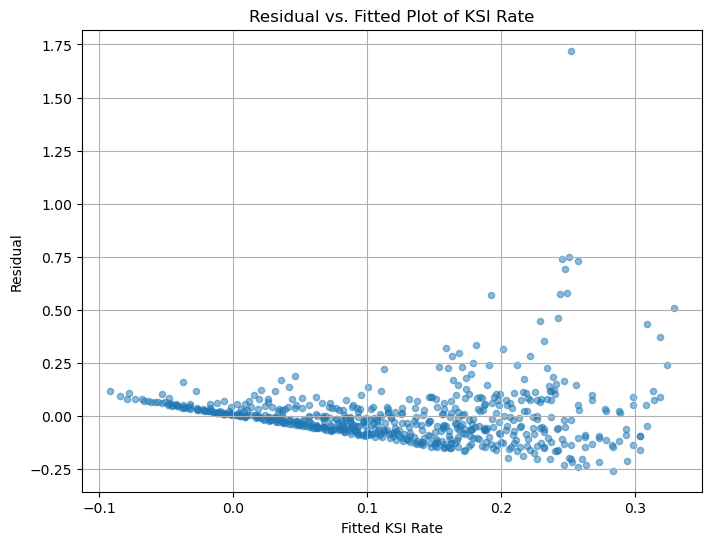

In [149]:
plt.figure(figsize=(8, 6))  
# alpha = 0.5: controlling the transparency of the markers. Here alpha = 0.5 means that the markers are semi-transparent.
# s = 20: controlling the size of the markers. The default value is plt.rcParams['lines.markersize'] ** 2. Here we set it as 20.
# To get the default value of marker size, run the following line
# print(plt.rcParams['lines.markersize'] ** 2) 
plt.scatter(results.fittedvalues, results.resid, alpha = 0.5, s=20)
# plt.scatter(model_bike_rental.fittedvalues, model_bike_rental.resid, alpha = 0.5)
# adding title and labels
plt.xlabel('Fitted KSI Rate')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of KSI Rate')
# Adding grid lines
plt.grid(True)
plt.show()

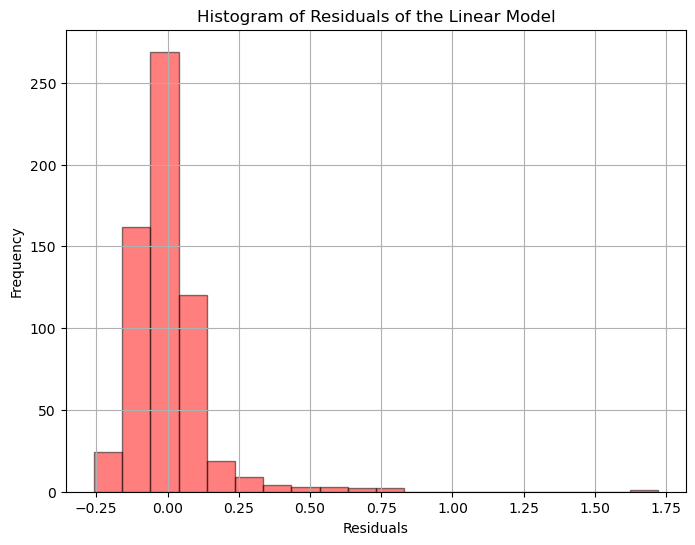

In [151]:
# Set the figure size
plt.figure(figsize=(8, 6))  

# Plotting the histogram
plt.hist(results.resid, bins=20, color='red', edgecolor='black', alpha=0.5)

# Adding labels and title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals of the Linear Model')

# Adding grid lines (optional)
plt.grid(True)

# Display the plot
plt.show()

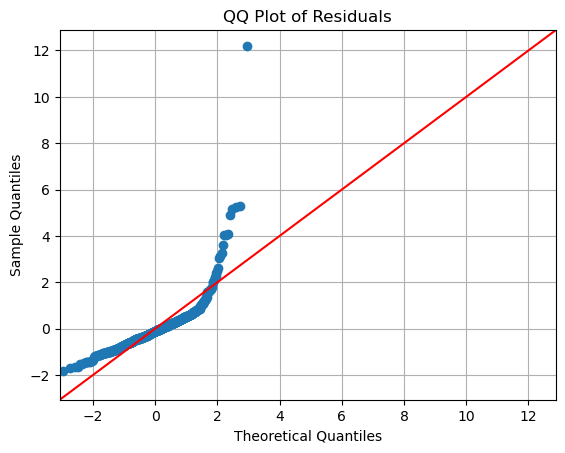

In [152]:
fig = sm.qqplot(results.resid, fit=True, line="45")
plt.title('QQ Plot of Residuals')

# Adding grid lines (optional)
plt.grid(True)

# Display the plot
plt.show()